In [1]:
import pandas as pd
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('codon_usage.csv')

/tmp/ipykernel_28756/409763158.py:1: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('codon_usage.csv')


In [3]:
df.head()

Kingdom  DNAtype  SpeciesID  Ncodons  \
0     vrl        0     100217     1995   
1     vrl        0     100220     1474   
2     vrl        0     100755     4862   
3     vrl        0     100880     1915   
4     vrl        0     100887    22831   

                               SpeciesName      UUU      UUC      UUA  \
0  Epizootic haematopoietic necrosis virus  0.01654  0.01203  0.00050   
1                         Bohle iridovirus  0.02714  0.01357  0.00068   
2             Sweet potato leaf curl virus  0.01974   0.0218  0.01357   
3             Northern cereal mosaic virus  0.01775  0.02245  0.01619   
4           Soil-borne cereal mosaic virus  0.02816  0.01371  0.00767   

       UUG      CUU  ...      CGG      AGA      AGG      GAU      GAC  \
0  0.00351  0.01203  ...  0.00451  0.01303  0.03559  0.01003  0.04612   
1  0.00678  0.00407  ...  0.00136  0.01696  0.03596  0.01221  0.04545   
2  0.01543  0.00782  ...  0.00596  0.01974  0.02489  0.03126  0.02036   
3  0.00992  0.01567  ...  0.00366  0.01410  0.01671  0.03760  0.01932   
4  0.03679  0.01380  ...  0.00604  0.01494  0.01734  0.04148  0.02483   

       GAA      GAG      UAA      UAG      UGA  
0  0.01203  0.04361  0.00251  0.00050  0.00000  
1  0.01560  0.04410  0.00271  0.00068  0.00000  
2  0.02242  0.02468  0.00391  0.00000  0.00144  
3  0.03029  0.03446  0.00261  0.00157  0.00000  
4  0.03359  0.03679  0.00000  0.00044  0.00131  

[5 rows x 69 columns]

In [4]:
# lista de reinos que tienen una poblacion menor
tipo_excluir = ['arc', 'phg', 'plm', 'mam', 'rod', 'pri']

In [5]:
# vamos a excluir a los reinos anteriores
df_excluido = df[~df['Kingdom'].isin(tipo_excluir)]

In [6]:
# df_excluido = pd.read_excel('sa.xlsx')

In [7]:
# vistazo a las variables
df_excluido.head(5)

Kingdom  DNAtype  SpeciesID  Ncodons  \
0     vrl        0     100217     1995   
1     vrl        0     100220     1474   
2     vrl        0     100755     4862   
3     vrl        0     100880     1915   
4     vrl        0     100887    22831   

                               SpeciesName      UUU      UUC      UUA  \
0  Epizootic haematopoietic necrosis virus  0.01654  0.01203  0.00050   
1                         Bohle iridovirus  0.02714  0.01357  0.00068   
2             Sweet potato leaf curl virus  0.01974   0.0218  0.01357   
3             Northern cereal mosaic virus  0.01775  0.02245  0.01619   
4           Soil-borne cereal mosaic virus  0.02816  0.01371  0.00767   

       UUG      CUU  ...      CGG      AGA      AGG      GAU      GAC  \
0  0.00351  0.01203  ...  0.00451  0.01303  0.03559  0.01003  0.04612   
1  0.00678  0.00407  ...  0.00136  0.01696  0.03596  0.01221  0.04545   
2  0.01543  0.00782  ...  0.00596  0.01974  0.02489  0.03126  0.02036   
3  0.00992  0.01567  ...  0.00366  0.01410  0.01671  0.03760  0.01932   
4  0.03679  0.01380  ...  0.00604  0.01494  0.01734  0.04148  0.02483   

       GAA      GAG      UAA      UAG      UGA  
0  0.01203  0.04361  0.00251  0.00050  0.00000  
1  0.01560  0.04410  0.00271  0.00068  0.00000  
2  0.02242  0.02468  0.00391  0.00000  0.00144  
3  0.03029  0.03446  0.00261  0.00157  0.00000  
4  0.03359  0.03679  0.00000  0.00044  0.00131  

[5 rows x 69 columns]

In [8]:
df_excluido.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11697 entries, 0 to 12060
Data columns (total 69 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Kingdom      11697 non-null  object 
 1   DNAtype      11697 non-null  int64  
 2   SpeciesID    11697 non-null  int64  
 3   Ncodons      11697 non-null  int64  
 4   SpeciesName  11697 non-null  object 
 5   UUU          11697 non-null  object 
 6   UUC          11697 non-null  object 
 7   UUA          11697 non-null  float64
 8   UUG          11697 non-null  float64
 9   CUU          11697 non-null  float64
 10  CUC          11697 non-null  float64
 11  CUA          11697 non-null  float64
 12  CUG          11697 non-null  float64
 13  AUU          11697 non-null  float64
 14  AUC          11697 non-null  float64
 15  AUA          11697 non-null  float64
 16  AUG          11697 non-null  float64
 17  GUU          11697 non-null  float64
 18  GUC          11697 non-null  float64
 19  GUA      

In [9]:
# hay dos filas en UUU Y UUC QUE TIENE VALORES STRING CUANDO DEBERIAN SER 0
# POR AHORA SE ELIMINAN MANUALMENTE y haremos uso del archivo sa

In [10]:
df_excluido = pd.read_excel('sa.xlsx')

KeyboardInterrupt: 

In [ ]:
df_excluido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11695 entries, 0 to 11694
Data columns (total 69 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Kingdom      11695 non-null  object 
 1   DNAtype      11695 non-null  int64  
 2   SpeciesID    11695 non-null  int64  
 3   Ncodons      11695 non-null  int64  
 4   SpeciesName  11695 non-null  object 
 5   UUU          11695 non-null  float64
 6   UUC          11695 non-null  float64
 7   UUA          11695 non-null  float64
 8   UUG          11695 non-null  float64
 9   CUU          11695 non-null  float64
 10  CUC          11695 non-null  float64
 11  CUA          11695 non-null  float64
 12  CUG          11695 non-null  float64
 13  AUU          11695 non-null  float64
 14  AUC          11695 non-null  float64
 15  AUA          11695 non-null  float64
 16  AUG          11695 non-null  float64
 17  GUU          11695 non-null  float64
 18  GUC          11695 non-null  float64
 19  GUA 

In [ ]:
df_excluido['Kingdom'].unique()

array(['vrl', 'bct', 'pln', 'inv', 'vrt'], dtype=object)

In [ ]:
df_excluido.columns

Index(['Kingdom', 'DNAtype', 'SpeciesID', 'Ncodons', 'SpeciesName', 'UUU',
       'UUC', 'UUA', 'UUG', 'CUU', 'CUC', 'CUA', 'CUG', 'AUU', 'AUC', 'AUA',
       'AUG', 'GUU', 'GUC', 'GUA', 'GUG', 'GCU', 'GCC', 'GCA', 'GCG', 'CCU',
       'CCC', 'CCA', 'CCG', 'UGG', 'GGU', 'GGC', 'GGA', 'GGG', 'UCU', 'UCC',
       'UCA', 'UCG', 'AGU', 'AGC', 'ACU', 'ACC', 'ACA', 'ACG', 'UAU', 'UAC',
       'CAA', 'CAG', 'AAU', 'AAC', 'UGU', 'UGC', 'CAU', 'CAC', 'AAA', 'AAG',
       'CGU', 'CGC', 'CGA', 'CGG', 'AGA', 'AGG', 'GAU', 'GAC', 'GAA', 'GAG',
       'UAA', 'UAG', 'UGA'],
      dtype='object')

In [ ]:
# lista de columnas que usaremos para clusterizar
columnas_clusterizar = ['Kingdom', 'UUU',
    'UUC', 'UUA', 'UUG', 'CUU', 'CUC', 'CUA', 'CUG', 'AUU', 'AUC', 'AUA',
       'AUG', 'GUU', 'GUC', 'GUA', 'GUG', 'GCU', 'GCC', 'GCA', 'GCG', 'CCU',
       'CCC', 'CCA', 'CCG', 'UGG', 'GGU', 'GGC', 'GGA', 'GGG', 'UCU', 'UCC',
       'UCA', 'UCG', 'AGU', 'AGC', 'ACU', 'ACC', 'ACA', 'ACG', 'UAU', 'UAC',
       'CAA', 'CAG', 'AAU', 'AAC', 'UGU', 'UGC', 'CAU', 'CAC', 'AAA', 'AAG',
       'CGU', 'CGC', 'CGA', 'CGG', 'AGA', 'AGG', 'GAU', 'GAC', 'GAA', 'GAG',
       'UAA', 'UAG', 'UGA'
]

In [ ]:
df_cl = df_excluido[columnas_clusterizar]

In [ ]:
df_cl.head(5)

Kingdom      UUU      UUC      UUA      UUG      CUU      CUC      CUA  \
0     vrl  0.01654  0.01203  0.00050  0.00351  0.01203  0.03208  0.00100   
1     vrl  0.02714  0.01357  0.00068  0.00678  0.00407  0.02849  0.00204   
2     vrl  0.01974  0.02180  0.01357  0.01543  0.00782  0.01111  0.01028   
3     vrl  0.01775  0.02245  0.01619  0.00992  0.01567  0.01358  0.00940   
4     vrl  0.02816  0.01371  0.00767  0.03679  0.01380  0.00548  0.00473   

       CUG      AUU  ...      CGG      AGA      AGG      GAU      GAC  \
0  0.04010  0.00551  ...  0.00451  0.01303  0.03559  0.01003  0.04612   
1  0.04410  0.01153  ...  0.00136  0.01696  0.03596  0.01221  0.04545   
2  0.01193  0.02283  ...  0.00596  0.01974  0.02489  0.03126  0.02036   
3  0.01723  0.02402  ...  0.00366  0.01410  0.01671  0.03760  0.01932   
4  0.02076  0.02716  ...  0.00604  0.01494  0.01734  0.04148  0.02483   

       GAA      GAG      UAA      UAG      UGA  
0  0.01203  0.04361  0.00251  0.00050  0.00000  
1  0.01560  0.04410  0.00271  0.00068  0.00000  
2  0.02242  0.02468  0.00391  0.00000  0.00144  
3  0.03029  0.03446  0.00261  0.00157  0.00000  
4  0.03359  0.03679  0.00000  0.00044  0.00131  

[5 rows x 65 columns]

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

df_cl.loc[:, "UUU":].corr()

UUU       UUC       UUA       UUG       CUU       CUC  \
UUU              1.000000 -0.378388  0.770436  0.353817  0.309411 -0.441106   
UUC             -0.378388  1.000000 -0.356166 -0.336759  0.027867  0.608749   
UUA              0.770436 -0.356166  1.000000  0.048483  0.245458 -0.378910   
UUG              0.353817 -0.336759  0.048483  1.000000  0.010246 -0.470510   
CUU              0.309411  0.027867  0.245458  0.010246  1.000000  0.203801   
...                   ...       ...       ...       ...       ...       ...   
DBSCAN_Cluster   0.055145 -0.025201  0.054663  0.051645  0.023945 -0.049655   
HDBSCAN_Cluster  0.045139 -0.065416 -0.010896  0.091455 -0.028708 -0.086971   
OPTICS_Cluster   0.159380 -0.041365  0.176037  0.013528  0.145658  0.005761   
GMM_Cluster      0.618310 -0.539414  0.592788  0.432574  0.051117 -0.679135   
Birch_Cluster   -0.038364 -0.081502 -0.003370  0.042180  0.023232 -0.047867   

                      CUA       CUG       AUU       AUC  ...  \
UUU              0.021483 -0.501837  0.744503 -0.476831  ...   
UUC              0.405635  0.219686 -0.324499  0.709603  ...   
UUA              0.159130 -0.544052  0.832327 -0.374074  ...   
UUG             -0.349645 -0.198874  0.101537 -0.443183  ...   
CUU              0.389406 -0.411774  0.425549 -0.047095  ...   
...                   ...       ...       ...       ...  ...   
DBSCAN_Cluster  -0.006141 -0.045555  0.083842 -0.050077  ...   
HDBSCAN_Cluster -0.051461 -0.011802 -0.021032 -0.107499  ...   
OPTICS_Cluster   0.112429 -0.146796  0.164288 -0.059394  ...   
GMM_Cluster     -0.247728 -0.577290  0.512096 -0.658808  ...   
Birch_Cluster    0.060008 -0.081896 -0.013321 -0.055305  ...   

                 cluster_hierarchical  cluster_dbscan  cluster_mean_shift  \
UUU                          0.305365        0.057958           -0.010841   
UUC                         -0.057834        0.378506            0.428485   
UUA                          0.430575        0.219073            0.131109   
UUG                         -0.126479       -0.419721           -0.435935   
CUU                          0.060435        0.440744            0.496873   
...                               ...             ...                 ...   
DBSCAN_Cluster               0.086872       -0.035043           -0.036668   
HDBSCAN_Cluster              0.013427       -0.064864           -0.094342   
OPTICS_Cluster               0.155549        0.127731            0.113522   
GMM_Cluster                  0.315987       -0.341784           -0.411165   
Birch_Cluster                0.169325        0.032011            0.045179   

                 cluster_gmm  KMeans_Cluster  DBSCAN_Cluster  HDBSCAN_Cluster  \
UUU                -0.214117       -0.002196        0.055145         0.045139   
UUC                -0.040090        0.225129       -0.025201        -0.065416   
UUA                -0.219651        0.149628        0.054663        -0.010896   
UUG                 0.050653       -0.346445        0.051645         0.091455   
CUU                 0.133729        0.068321        0.023945        -0.028708   
...                      ...             ...             ...              ...   
DBSCAN_Cluster     -0.074695        0.025379        1.000000        -0.025413   
HDBSCAN_Cluster     0.119898       -0.066173       -0.025413         1.000000   
OPTICS_Cluster     -0.103758        0.081563        0.378854         0.144108   
GMM_Cluster        -0.059183       -0.197356        0.106993         0.059640   
Birch_Cluster       0.379092        0.233812       -0.083562         0.128110   

                 OPTICS_Cluster  GMM_Cluster  Birch_Cluster  
UUU                    0.159380     0.618310      -0.038364  
UUC                   -0.041365    -0.539414      -0.081502  
UUA                    0.176037     0.592788      -0.003370  
UUG                    0.013528     0.432574       0.042180  
CUU                    0.145658     0.051117       0.023232  
...                         ...   

In [ ]:
# validamos los tipos de las columnas
df_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11695 entries, 0 to 11694
Data columns (total 80 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Kingdom               11695 non-null  object 
 1   UUU                   11695 non-null  float64
 2   UUC                   11695 non-null  float64
 3   UUA                   11695 non-null  float64
 4   UUG                   11695 non-null  float64
 5   CUU                   11695 non-null  float64
 6   CUC                   11695 non-null  float64
 7   CUA                   11695 non-null  float64
 8   CUG                   11695 non-null  float64
 9   AUU                   11695 non-null  float64
 10  AUC                   11695 non-null  float64
 11  AUA                   11695 non-null  float64
 12  AUG                   11695 non-null  float64
 13  GUU                   11695 non-null  float64
 14  GUC                   11695 non-null  float64
 15  GUA                

In [ ]:
df_cl

Kingdom      UUU      UUC      UUA      UUG      CUU      CUC      CUA  \
0         vrl  0.01654  0.01203  0.00050  0.00351  0.01203  0.03208  0.00100   
1         vrl  0.02714  0.01357  0.00068  0.00678  0.00407  0.02849  0.00204   
2         vrl  0.01974  0.02180  0.01357  0.01543  0.00782  0.01111  0.01028   
3         vrl  0.01775  0.02245  0.01619  0.00992  0.01567  0.01358  0.00940   
4         vrl  0.02816  0.01371  0.00767  0.03679  0.01380  0.00548  0.00473   
...       ...      ...      ...      ...      ...      ...      ...      ...   
11690     vrt  0.01679  0.03228  0.03486  0.00194  0.05939  0.04906  0.07037   
11691     vrt  0.02270  0.01079  0.01191  0.01662  0.01240  0.00670  0.00521   
11692     vrt  0.03087  0.02367  0.00162  0.00000  0.00209  0.05082  0.06173   
11693     vrt  0.01666  0.02917  0.00469  0.01083  0.00876  0.02408  0.00359   
11694     vrt  0.02881  0.04089  0.01789  0.00953  0.02695  0.04229  0.05855   

           CUG      AUU  ...  cluster_hierarchical  cluster_dbscan  \
0      0.04010  0.00551  ...                     0               0   
1      0.04410  0.01153  ...                     0               0   
2      0.01193  0.02283  ...                     1               0   
3      0.01723  0.02402  ...                     1               0   
4      0.02076  0.02716  ...                     1              -1   
...        ...      ...  ...                   ...             ...   
11690  0.00839  0.03551  ...                     2              27   
11691  0.01377  0.02493  ...                     1               0   
11692  0.01694  0.00278  ...                     2              -1   
11693  0.05573  0.01121  ...                     0               0   
11694  0.01092  0.02370  ...                     2              27   

       cluster_mean_shift  cluster_gmm  KMeans_Cluster  DBSCAN_Cluster  \
0                       0            2               0              -1   
1                       0            2               0              -1   
2                       0            4               1              -1   
3                       0            4               1              -1   
4                       0            4               1              -1   
...                   ...          ...             ...             ...   
11690                   1            3               3              -1   
11691                   0            4               1              -1   
11692                   1            3               3              -1   
11693                   0            1               0              -1   
11694                   1            3               3              -1   

       HDBSCAN_Cluster  OPTICS_Cluster  GMM_Cluster  Birch_Cluster  
0                   32               0            0              0  
1                   32               0            0              0  
2                   -1              -1            1              4  
3                   -1              -1            1              4  
4                  193              -1            1              4  
...                ...             ...          ...            ...  
11690               -1             301            0              2  
11691              172             119            1              0  
11692               -1              -1            0              2  
11693              252              -1            0              0  
11694               66              -1            0              2  

[11695 rows x 80 columns]

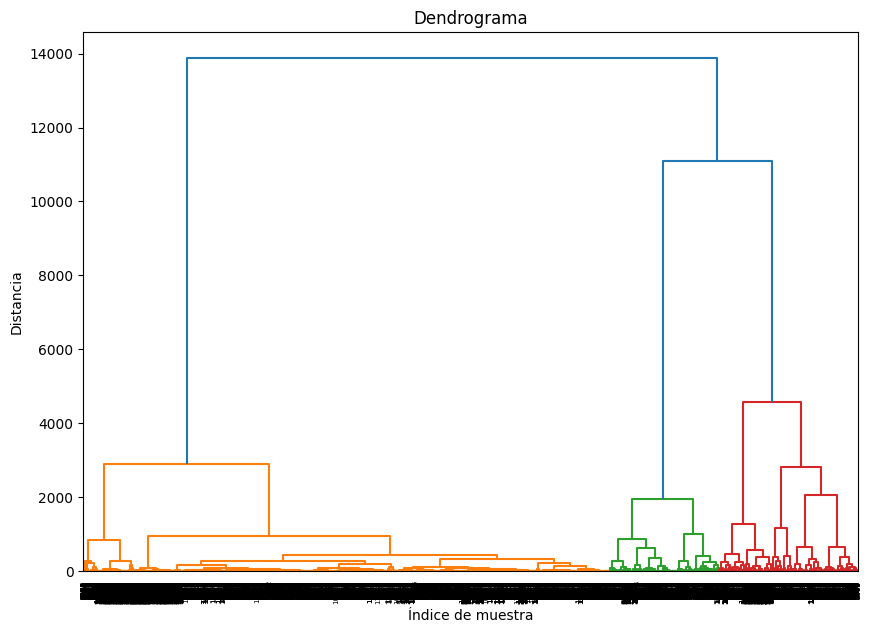

In [ ]:
# aplicamos un dendograma que permite conocer las relaciones entre las variables que queremos clusterizar
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage


# Calcular la matriz de linkage
Z = linkage(df_cl.iloc[:,1:], method='ward')

# Crear y mostrar el dendrograma
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrograma')
plt.xlabel('Índice de muestra')
plt.ylabel('Distancia')
plt.show()

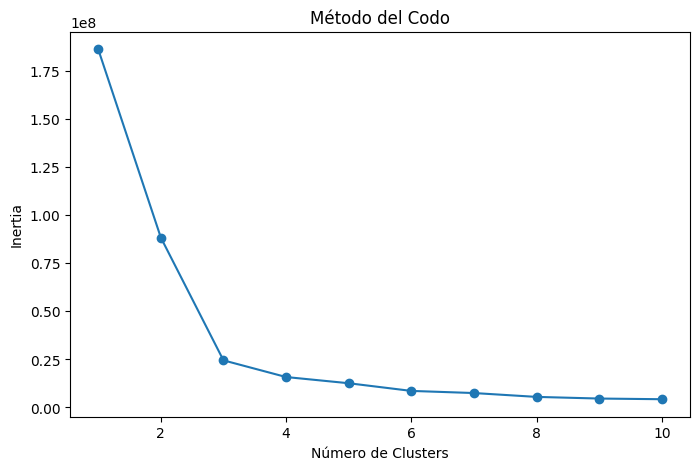

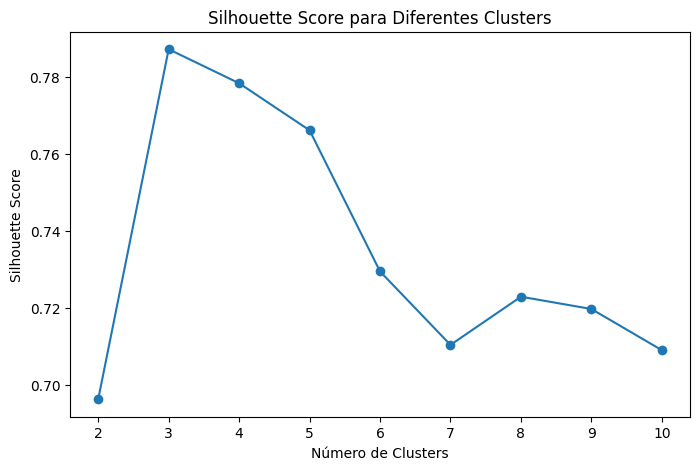

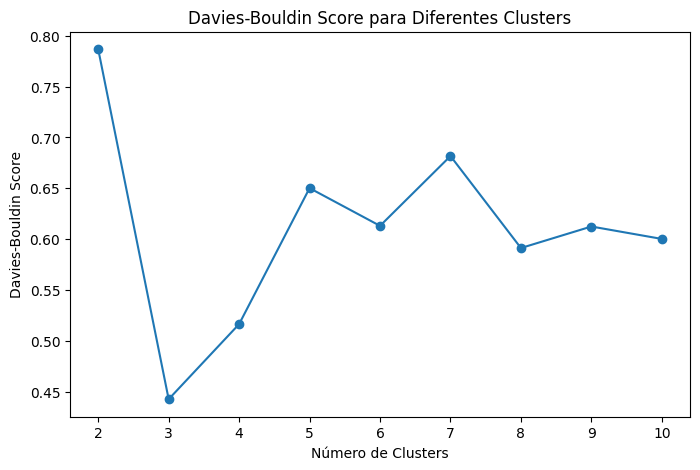

In [ ]:
# aplicamos distintas metricas para decir que numero de cluster elegir
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score, silhouette_score

# Método del Codo
def plot_elbow_method(X):
    inertia = []
    k_range = range(1, 11)

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)

    plt.figure(figsize=(8, 5))
    plt.plot(k_range, inertia, marker='o')
    plt.xlabel('Número de Clusters')
    plt.ylabel('Inertia')
    plt.title('Método del Codo')
    plt.show()

# Silhouette Score
def plot_silhouette_score(X):
    silhouette_scores = []
    k_range = range(2, 11)

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=0)
        clusters = kmeans.fit_predict(X)
        score = silhouette_score(X, clusters)
        silhouette_scores.append(score)

    plt.figure(figsize=(8, 5))
    plt.plot(k_range, silhouette_scores, marker='o')
    plt.xlabel('Número de Clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score para Diferentes Clusters')
    plt.show()

# Calinski-Harabasz Index
def plot_calinski_harabasz_index(X):
    calinski_scores = []
    k_range = range(2, 11)

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=0)
        clusters = kmeans.fit_predict(X)
        score = calinski_harabasz_score(X, clusters)
        calinski_scores.append(score)

    plt.figure(figsize=(8, 5))
    plt.plot(k_range, calinski_scores, marker='o')
    plt.xlabel('Número de Clusters')
    plt.ylabel('Calinski-Harabasz Score')
    plt.title('Calinski-Harabasz Score para Diferentes Clusters')
    plt.show()

# Davies-Bouldin Index
def plot_davies_bouldin_index(X):
    davies_bouldin_scores = []
    k_range = range(2, 11)

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=0)
        clusters = kmeans.fit_predict(X)
        score = davies_bouldin_score(X, clusters)
        davies_bouldin_scores.append(score)

    plt.figure(figsize=(8, 5))
    plt.plot(k_range, davies_bouldin_scores, marker='o')
    plt.xlabel('Número de Clusters')
    plt.ylabel('Davies-Bouldin Score')
    plt.title('Davies-Bouldin Score para Diferentes Clusters')
    plt.show()

# Ejecutar los métodos
plot_elbow_method(df_cl.iloc[:,1:])
plot_silhouette_score(df_cl.iloc[:,1:])
plot_calinski_harabasz_index(df_cl.iloc[:,1:])
plot_davies_bouldin_index(df_cl.iloc[:,1:])

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, OPTICS, Birch
from sklearn.mixture import GaussianMixture
import hdbscan
import scipy.cluster.hierarchy as sch

In [ ]:
df_cl_aux = df_cl

In [ ]:
df_cl_aux['Kingdom'].unique()

array(['vrl', 'bct', 'pln', 'inv', 'vrt'], dtype=object)

In [ ]:
# vamos a mapear nuestra verdad absoluta para comparar con los cluster
kingdom_mapping = {
 'vrl': 0,
   'bct': 1,
     'pln': 3, 'inv' :4, 'vrt': 5
}
df_cl_aux['cluster_or'] = df_cl_aux['Kingdom'].replace(kingdom_mapping)

/tmp/ipykernel_34898/1119065178.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cl_aux['cluster_or'] = df_cl_aux['Kingdom'].replace(kingdom_mapping)


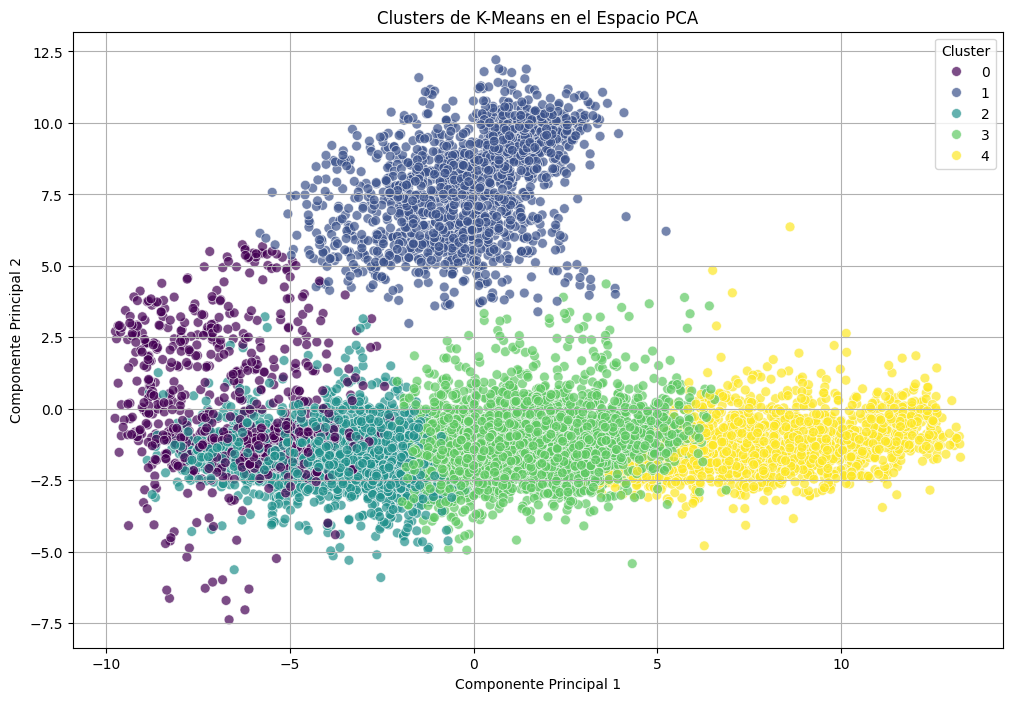

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Supongamos que ya tienes el DataFrame 'df'
df = df_cl_aux
# Seleccionar solo las columnas numéricas (frecuencias de codones)
numeric_columns = df.select_dtypes(include=['float64']).columns

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[numeric_columns])

# Aplicar K-Means
kmeans = KMeans(n_clusters=5, random_state=42)  # Cambia el número de clusters según sea necesario
df['cluster_kmeans'] = kmeans.fit_predict(X_scaled)

# Usar PCA para reducir la dimensionalidad a 2D para la visualización
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# Visualizar los clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='cluster_kmeans', palette='viridis', marker='o', s=50, alpha=0.7)
plt.title('Clusters de K-Means en el Espacio PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Supongamos que ya tienes el DataFrame 'df'
df = df_cl_aux
# Seleccionar solo las columnas numéricas (frecuencias de codones)
numeric_columns = df.select_dtypes(include=['float64']).columns

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[numeric_columns])

# Aplicar K-Means
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster_kmeans'] = kmeans.fit_predict(X_scaled)

# Usar PCA para reducir la dimensionalidad a 3D
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]
df['PCA3'] = X_pca[:, 2]

# Crear el gráfico 3D
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

# Graficar clusters predichos
scatter = ax.scatter(df['PCA1'], df['PCA2'], df['PCA3'], c=df['cluster_kmeans'], cmap='viridis', marker='o', s=50, alpha=0.7, label='Cluster K-Means')

# Agregar etiquetas y título
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
ax.set_title('Clusters de K-Means vs Etiquetas Reales')

# Agregar leyenda
cbar = plt.colorbar(scatter)
cbar.set_label('Cluster K-Means')

plt.show()


In [ ]:
df_cl_aux

Kingdom      UUU      UUC      UUA      UUG      CUU      CUC      CUA  \
0         vrl  0.01654  0.01203  0.00050  0.00351  0.01203  0.03208  0.00100   
1         vrl  0.02714  0.01357  0.00068  0.00678  0.00407  0.02849  0.00204   
2         vrl  0.01974  0.02180  0.01357  0.01543  0.00782  0.01111  0.01028   
3         vrl  0.01775  0.02245  0.01619  0.00992  0.01567  0.01358  0.00940   
4         vrl  0.02816  0.01371  0.00767  0.03679  0.01380  0.00548  0.00473   
...       ...      ...      ...      ...      ...      ...      ...      ...   
11690     vrt  0.01679  0.03228  0.03486  0.00194  0.05939  0.04906  0.07037   
11691     vrt  0.02270  0.01079  0.01191  0.01662  0.01240  0.00670  0.00521   
11692     vrt  0.03087  0.02367  0.00162  0.00000  0.00209  0.05082  0.06173   
11693     vrt  0.01666  0.02917  0.00469  0.01083  0.00876  0.02408  0.00359   
11694     vrt  0.02881  0.04089  0.01789  0.00953  0.02695  0.04229  0.05855   

           CUG      AUU  ...  cluster_hierarchical  cluster_dbscan  \
0      0.04010  0.00551  ...                     0               0   
1      0.04410  0.01153  ...                     0               0   
2      0.01193  0.02283  ...                     1               0   
3      0.01723  0.02402  ...                     1               0   
4      0.02076  0.02716  ...                     1              -1   
...        ...      ...  ...                   ...             ...   
11690  0.00839  0.03551  ...                     2              27   
11691  0.01377  0.02493  ...                     1               0   
11692  0.01694  0.00278  ...                     2              -1   
11693  0.05573  0.01121  ...                     0               0   
11694  0.01092  0.02370  ...                     2              27   

       cluster_mean_shift  cluster_gmm  KMeans_Cluster  DBSCAN_Cluster  \
0                       0            2               0              -1   
1                       0            2               0              -1   
2                       0            4               1              -1   
3                       0            4               1              -1   
4                       0            4               1              -1   
...                   ...          ...             ...             ...   
11690                   1            3               3              -1   
11691                   0            4               1              -1   
11692                   1            3               3              -1   
11693                   0            1               0              -1   
11694                   1            3               3              -1   

       HDBSCAN_Cluster  OPTICS_Cluster  GMM_Cluster  Birch_Cluster  
0                   32               0            0              0  
1                   32               0            0              0  
2                   -1              -1            1              4  
3                   -1              -1            1              4  
4                  193              -1            1              4  
...                ...             ...          ...            ...  
11690               -1             301            0              2  
11691              172             119            1              0  
11692               -1              -1            0              2  
11693              252              -1            0              0  
11694               66              -1            0              2  

[11695 rows x 80 columns]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Supongamos que ya tienes el DataFrame 'df'

# Seleccionar solo las columnas numéricas (frecuencias de codones)
numeric_columns = df.select_dtypes(include=['float64']).columns

# Escalar las características
scaler = StandardScaler()
X_scaled = df[numeric_columns]

# Aplicar K-Means
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster_kmeans'] = kmeans.fit_predict(X_scaled)

# Usar PCA para reducir la dimensionalidad a 3D
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]
df['PCA3'] = X_pca[:, 2]

# Crear la figura y los ejes para las subgráficas
fig = plt.figure(figsize=(15, 10))

# Subgráfico 1: Clusters Predichos
ax1 = fig.add_subplot(121, projection='3d')
scatter_predicted = ax1.scatter(df['PCA1'], df['PCA2'], df['PCA3'], c=df['cluster_kmeans'], cmap='viridis', marker='o', s=50, alpha=0.7)
ax1.set_xlabel('Componente Principal 1')
ax1.set_ylabel('Componente Principal 2')
ax1.set_zlabel('Componente Principal 3')
ax1.set_title('Clusters Predichos por K-Means')
cbar_pred = plt.colorbar(scatter_predicted, ax=ax1)
cbar_pred.set_label('Cluster K-Means')

# Subgráfico 2: Etiquetas Reales
ax2 = fig.add_subplot(122, projection='3d')
scatter_real = ax2.scatter(df['PCA1'], df['PCA2'], df['PCA3'], c=df['cluster_or'], cmap='viridis', marker='x', s=50, alpha=0.7)
ax2.set_xlabel('Componente Principal 1')
ax2.set_ylabel('Componente Principal 2')
ax2.set_zlabel('Componente Principal 3')
ax2.set_title('Etiquetas Reales')
cbar_real = plt.colorbar(scatter_real, ax=ax2)
cbar_real.set_label('Etiqueta Real')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# Aplicar agrupamiento jerárquico
hierarchical = AgglomerativeClustering(n_clusters=5)
df_cl_aux['cluster_hierarchical'] = hierarchical.fit_predict(X_scaled)

# Crear un dendrograma
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title('Dendrograma')
plt.xlabel('Índice de Muestra')
plt.ylabel('Distancia')
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN

# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
df_cl_aux['cluster_dbscan'] = dbscan.fit_predict(X_scaled)

# Visualizar los clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='cluster_dbscan', palette='viridis', marker='o', s=50, alpha=0.7)
plt.title('Clusters de DBSCAN en el Espacio PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


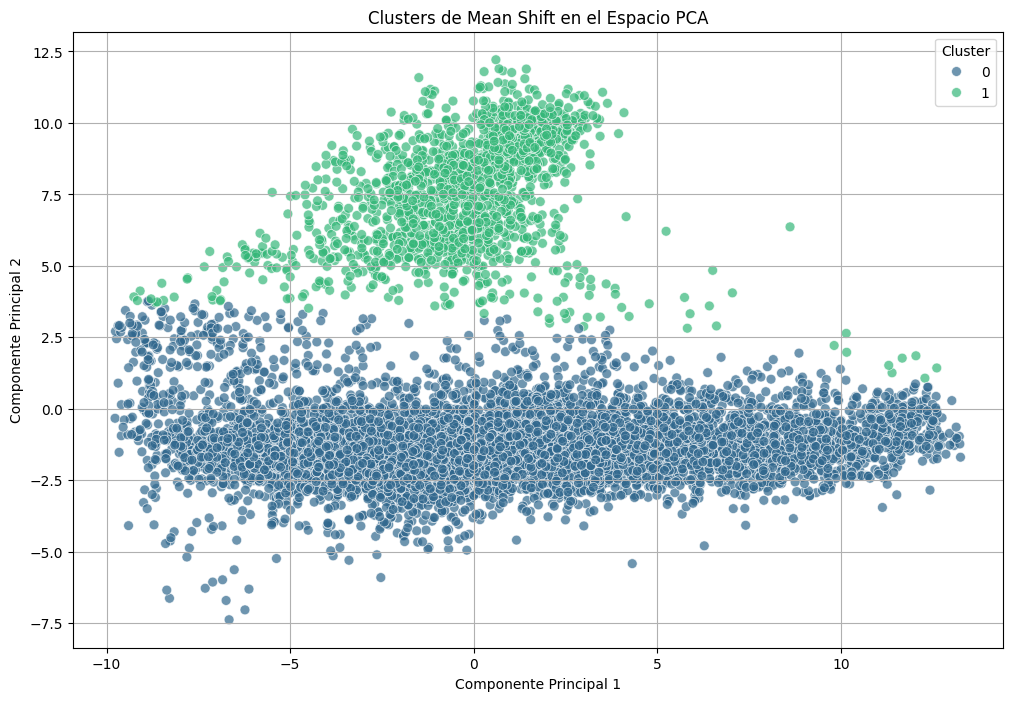

In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Estimar el bandwidth para Mean Shift
bandwidth = estimate_bandwidth(X_scaled, quantile=0.2)
mean_shift = MeanShift(bandwidth=bandwidth)
df_cl_aux['cluster_mean_shift'] = mean_shift.fit_predict(X_scaled)

# Visualizar los clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='cluster_mean_shift', palette='viridis', marker='o', s=50, alpha=0.7)
plt.title('Clusters de Mean Shift en el Espacio PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


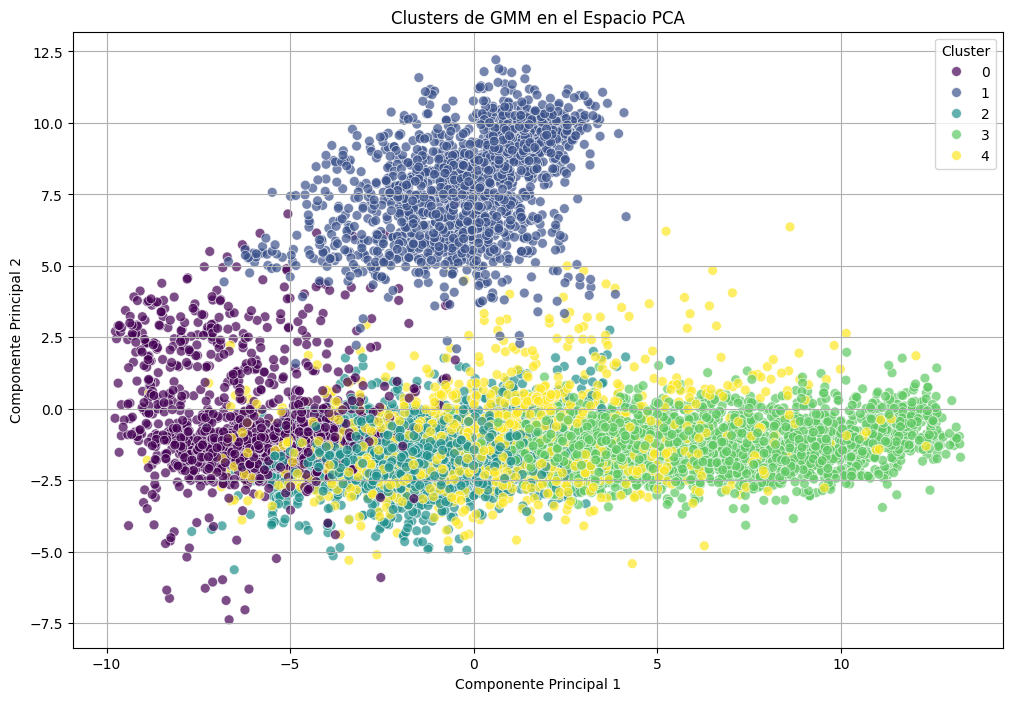

In [ ]:
from sklearn.mixture import GaussianMixture

# Aplicar GMM
gmm = GaussianMixture(n_components=5, random_state=42)
df_cl_aux['cluster_gmm'] = gmm.fit_predict(X_scaled)

# Visualizar los clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_cl_aux, x='PCA1', y='PCA2', hue='cluster_gmm', palette='viridis', marker='o', s=50, alpha=0.7)
plt.title('Clusters de GMM en el Espacio PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


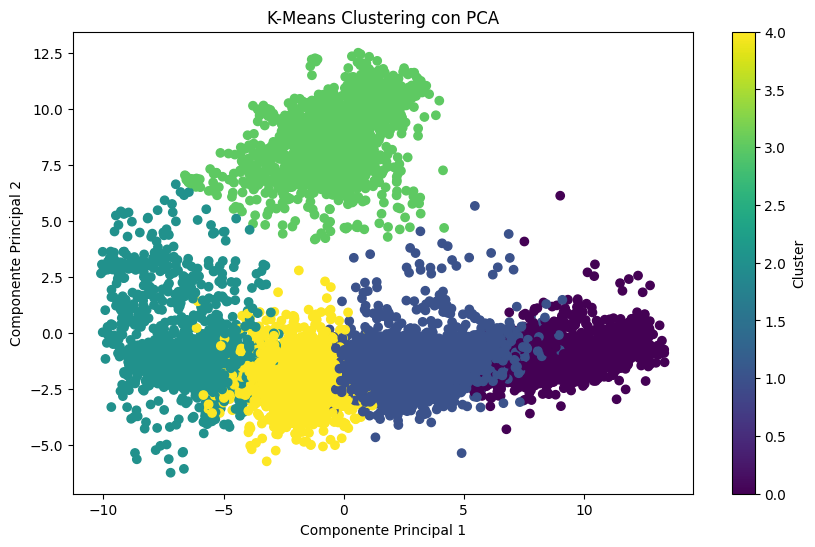

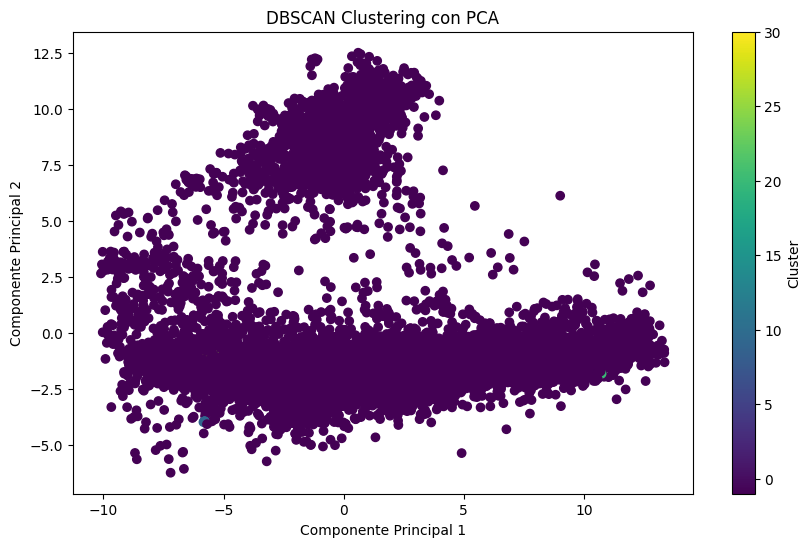

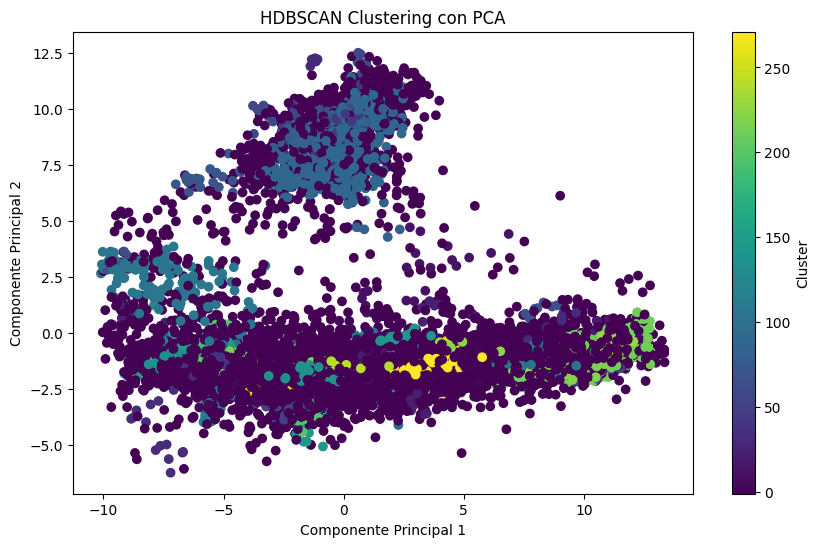

/home/paul/Development/ciencia_datos/AprendizajeAutomatico/trabajo-final-aprendizaje-supervisado/.venv/lib/python3.12/site-packages/sklearn/cluster/_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


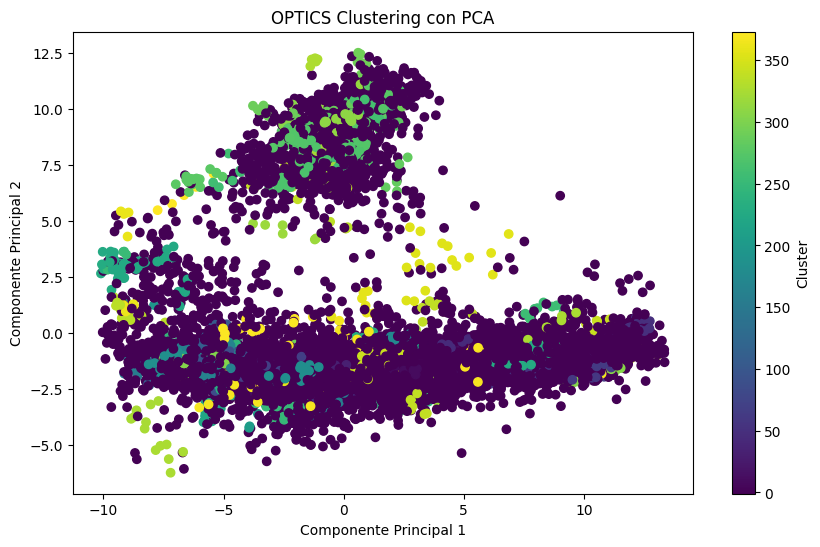

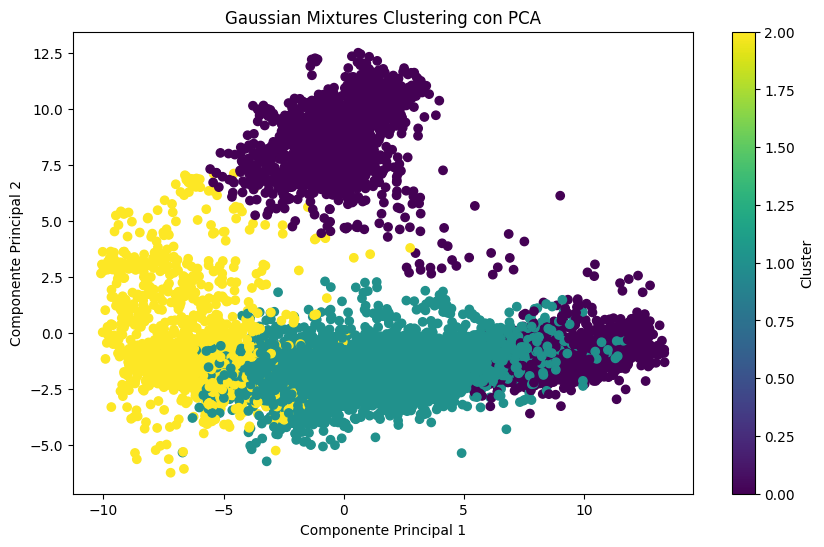

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, OPTICS, Birch
from sklearn.mixture import GaussianMixture
import hdbscan
import scipy.cluster.hierarchy as sch

# Cargar los datos
df = df_cl_aux

# Seleccionar las columnas Q1 a Q28
features = df.loc[:, 'UUU':]

# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Reducir dimensionalidad con PCA para visualización
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# Función para visualizar los clusters
def plot_clusters(df, cluster_col, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(df['PCA1'], df['PCA2'], c=df[cluster_col], cmap='viridis', marker='o')
    plt.title(title)
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.colorbar(label='Cluster')
    plt.show()

# 1. K-Means
kmeans = KMeans(n_clusters=5, random_state=0)
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)
plot_clusters(df, 'KMeans_Cluster', 'K-Means Clustering con PCA')

# # 2. Affinity Propagation
# from sklearn.cluster import AffinityPropagation
# affinity_propagation = AffinityPropagation(random_state=0)
# df['Affinity_Cluster'] = affinity_propagation.fit_predict(X_scaled)
# plot_clusters(df, 'Affinity_Cluster', 'Affinity Propagation Clustering con PCA')

# # 3. Mean-Shift
# from sklearn.cluster import MeanShift
# mean_shift = MeanShift()
# df['MeanShift_Cluster'] = mean_shift.fit_predict(X_scaled)
# plot_clusters(df, 'MeanShift_Cluster', 'Mean-Shift Clustering con PCA')

# # 4. Spectral Clustering
# from sklearn.cluster import SpectralClustering
# spectral_clustering = SpectralClustering(n_clusters=5, random_state=0)
# df['Spectral_Cluster'] = spectral_clustering.fit_predict(X_scaled)
# plot_clusters(df, 'Spectral_Cluster', 'Spectral Clustering con PCA')

# # 5. Ward Hierarchical Clustering
# plt.figure(figsize=(10, 7))
# dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
# plt.title('Dendrograma - Ward Hierarchical Clustering')
# plt.xlabel('Índice de Muestra')
# plt.ylabel('Distancia')
# plt.show()

# ward_clustering = AgglomerativeClustering(n_clusters=5, linkage='ward')
# df['Ward_Cluster'] = ward_clustering.fit_predict(X_scaled)
# plot_clusters(df, 'Ward_Cluster', 'Ward Hierarchical Clustering con PCA')

# # 6. Agglomerative Clustering
# agg_clustering = AgglomerativeClustering(n_clusters=5, linkage='average')
# df['Agglomerative_Cluster'] = agg_clustering.fit_predict(X_scaled)
# plot_clusters(df, 'Agglomerative_Cluster', 'Agglomerative Clustering con PCA')

# 7. DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)
plot_clusters(df, 'DBSCAN_Cluster', 'DBSCAN Clustering con PCA')

# 8. HDBSCAN
hdbscan_cluster = hdbscan.HDBSCAN(min_cluster_size=5)
df['HDBSCAN_Cluster'] = hdbscan_cluster.fit_predict(X_scaled)
plot_clusters(df, 'HDBSCAN_Cluster', 'HDBSCAN Clustering con PCA')

# 9. OPTICS
optics = OPTICS(min_samples=5)
df['OPTICS_Cluster'] = optics.fit_predict(X_scaled)
plot_clusters(df, 'OPTICS_Cluster', 'OPTICS Clustering con PCA')

# 10. Gaussian Mixtures
gmm = GaussianMixture(n_components=3, random_state=0)
df['GMM_Cluster'] = gmm.fit_predict(X_scaled)
plot_clusters(df, 'GMM_Cluster', 'Gaussian Mixtures Clustering con PCA')

# 11. BIRCH
birch = Birch(n_clusters=5)
df['Birch_Cluster'] = birch.fit_predict(X_scaled)
plot_clusters(df, 'Birch_Cluster', 'BIRCH Clustering con PCA')

# 12. Bisecting K-Means
def bisecting_kmeans(X, k):
    clusters = [KMeans(n_clusters=1, random_state=0).fit(X)]
    
    while len(clusters) < k:
        largest_cluster = max(clusters, key=lambda c: c.inertia_)
        clusters.remove(largest_cluster)
        
        kmeans = KMeans(n_clusters=2, random_state=0)
        labels = kmeans.fit_predict(X[largest_cluster.labels_ == largest_cluster.labels_[0]])
        for i, cluster in enumerate(set(labels)):
            clusters.append(KMeans(n_clusters=1, random_state=0).fit(X[labels == cluster]))
    
    return clusters

# k = 3
# bisecting_clusters = bisecting_kmeans(X_scaled, k)
# df['Bisecting_KMeans_Cluster'] = bisecting_clusters[0].predict(X_scaled)
# plot_clusters(df, 'Bisecting_KMeans_Cluster', 'Bisecting K-Means Clustering con PCA')


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage


# Calcular la matriz de linkage
Z = linkage(df_cl, method='ward')

# Crear y mostrar el dendrograma
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrograma')
plt.xlabel('Índice de muestra')
plt.ylabel('Distancia')
plt.show()


ValueError: could not convert string to float: 'vrl'

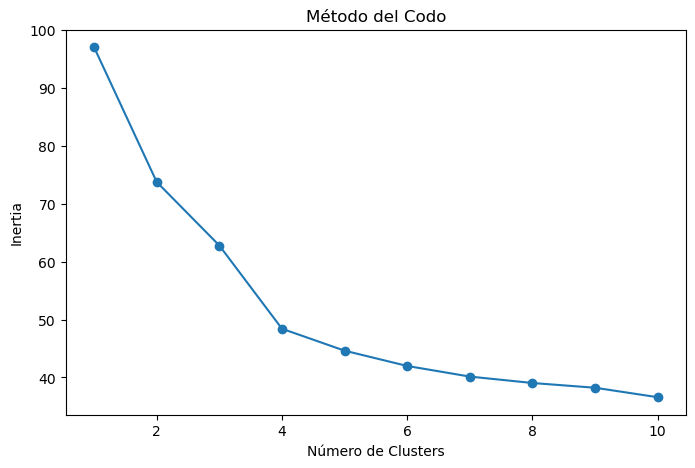

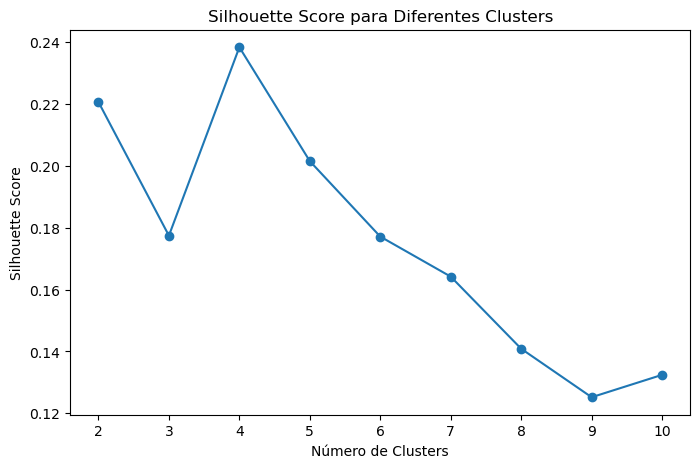

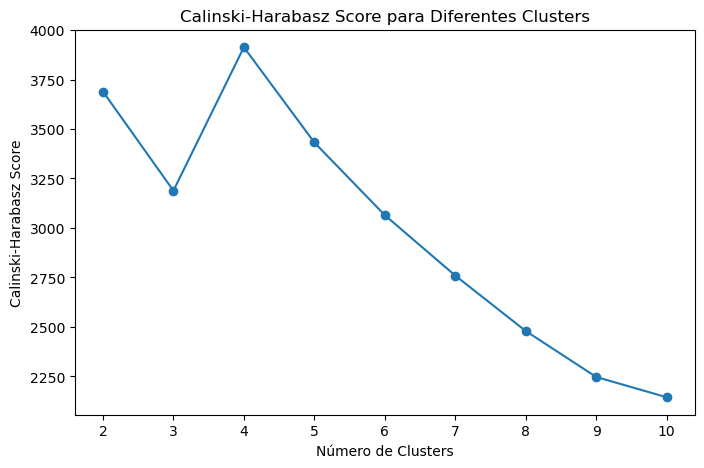

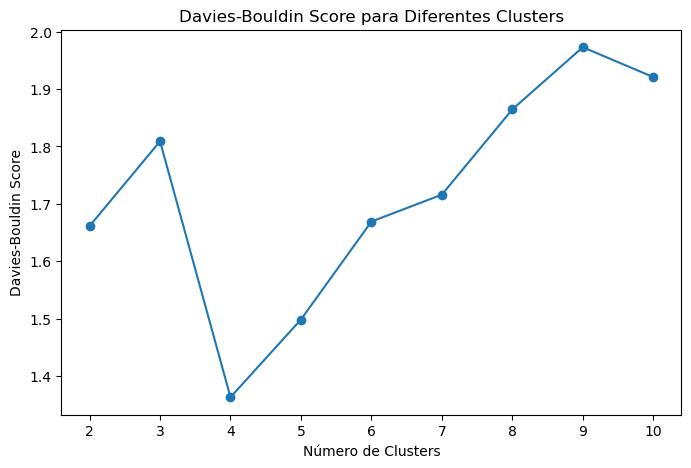

In [ ]:

from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score, silhouette_score

# Método del Codo
def plot_elbow_method(X):
    inertia = []
    k_range = range(1, 11)

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)

    plt.figure(figsize=(8, 5))
    plt.plot(k_range, inertia, marker='o')
    plt.xlabel('Número de Clusters')
    plt.ylabel('Inertia')
    plt.title('Método del Codo')
    plt.show()

# Silhouette Score
def plot_silhouette_score(X):
    silhouette_scores = []
    k_range = range(2, 11)

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=0)
        clusters = kmeans.fit_predict(X)
        score = silhouette_score(X, clusters)
        silhouette_scores.append(score)

    plt.figure(figsize=(8, 5))
    plt.plot(k_range, silhouette_scores, marker='o')
    plt.xlabel('Número de Clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score para Diferentes Clusters')
    plt.show()

# Calinski-Harabasz Index
def plot_calinski_harabasz_index(X):
    calinski_scores = []
    k_range = range(2, 11)

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=0)
        clusters = kmeans.fit_predict(X)
        score = calinski_harabasz_score(X, clusters)
        calinski_scores.append(score)

    plt.figure(figsize=(8, 5))
    plt.plot(k_range, calinski_scores, marker='o')
    plt.xlabel('Número de Clusters')
    plt.ylabel('Calinski-Harabasz Score')
    plt.title('Calinski-Harabasz Score para Diferentes Clusters')
    plt.show()

# Davies-Bouldin Index
def plot_davies_bouldin_index(X):
    davies_bouldin_scores = []
    k_range = range(2, 11)

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=0)
        clusters = kmeans.fit_predict(X)
        score = davies_bouldin_score(X, clusters)
        davies_bouldin_scores.append(score)

    plt.figure(figsize=(8, 5))
    plt.plot(k_range, davies_bouldin_scores, marker='o')
    plt.xlabel('Número de Clusters')
    plt.ylabel('Davies-Bouldin Score')
    plt.title('Davies-Bouldin Score para Diferentes Clusters')
    plt.show()

# Ejecutar los métodos
plot_elbow_method(df_cl)
plot_silhouette_score(df_cl)
plot_calinski_harabasz_index(df_cl)
plot_davies_bouldin_index(df_cl)


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, OPTICS, Birch
from sklearn.mixture import GaussianMixture
import hdbscan
import scipy.cluster.hierarchy as sch


X_scaled = df_cl

# Función para visualizar los clusters
def plot_clusters(df, cluster_col, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(df['PCA1'], df['PCA2'], c=df[cluster_col], cmap='viridis', marker='o')
    plt.title(title)
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.colorbar(label='Cluster')
    plt.show()

# 1. K-Means
kmeans = KMeans(n_clusters=3, random_state=0)
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)
plot_clusters(df, 'KMeans_Cluster', 'K-Means Clustering con PCA')

# 2. Affinity Propagation
from sklearn.cluster import AffinityPropagation
affinity_propagation = AffinityPropagation(random_state=0)
df['Affinity_Cluster'] = affinity_propagation.fit_predict(X_scaled)
plot_clusters(df, 'Affinity_Cluster', 'Affinity Propagation Clustering con PCA')

# 3. Mean-Shift
from sklearn.cluster import MeanShift
mean_shift = MeanShift()
df['MeanShift_Cluster'] = mean_shift.fit_predict(X_scaled)
plot_clusters(df, 'MeanShift_Cluster', 'Mean-Shift Clustering con PCA')

# 4. Spectral Clustering
from sklearn.cluster import SpectralClustering
spectral_clustering = SpectralClustering(n_clusters=3, random_state=0)
df['Spectral_Cluster'] = spectral_clustering.fit_predict(X_scaled)
plot_clusters(df, 'Spectral_Cluster', 'Spectral Clustering con PCA')

# 5. Ward Hierarchical Clustering
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title('Dendrograma - Ward Hierarchical Clustering')
plt.xlabel('Índice de Muestra')
plt.ylabel('Distancia')
plt.show()

ward_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
df['Ward_Cluster'] = ward_clustering.fit_predict(X_scaled)
plot_clusters(df, 'Ward_Cluster', 'Ward Hierarchical Clustering con PCA')

# 6. Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='average')
df['Agglomerative_Cluster'] = agg_clustering.fit_predict(X_scaled)
plot_clusters(df, 'Agglomerative_Cluster', 'Agglomerative Clustering con PCA')

# 7. DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)
plot_clusters(df, 'DBSCAN_Cluster', 'DBSCAN Clustering con PCA')

# 8. HDBSCAN
hdbscan_cluster = hdbscan.HDBSCAN(min_cluster_size=5)
df['HDBSCAN_Cluster'] = hdbscan_cluster.fit_predict(X_scaled)
plot_clusters(df, 'HDBSCAN_Cluster', 'HDBSCAN Clustering con PCA')

# 9. OPTICS
optics = OPTICS(min_samples=5)
df['OPTICS_Cluster'] = optics.fit_predict(X_scaled)
plot_clusters(df, 'OPTICS_Cluster', 'OPTICS Clustering con PCA')

# 10. Gaussian Mixtures
gmm = GaussianMixture(n_components=3, random_state=0)
df['GMM_Cluster'] = gmm.fit_predict(X_scaled)
plot_clusters(df, 'GMM_Cluster', 'Gaussian Mixtures Clustering con PCA')

# 11. BIRCH
birch = Birch(n_clusters=3)
df['Birch_Cluster'] = birch.fit_predict(X_scaled)
plot_clusters(df, 'Birch_Cluster', 'BIRCH Clustering con PCA')

# 12. Bisecting K-Means
def bisecting_kmeans(X, k):
    clusters = [KMeans(n_clusters=1, random_state=0).fit(X)]
    
    while len(clusters) < k:
        largest_cluster = max(clusters, key=lambda c: c.inertia_)
        clusters.remove(largest_cluster)
        
        kmeans = KMeans(n_clusters=2, random_state=0)
        labels = kmeans.fit_predict(X[largest_cluster.labels_ == largest_cluster.labels_[0]])
        for i, cluster in enumerate(set(labels)):
            clusters.append(KMeans(n_clusters=1, random_state=0).fit(X[labels == cluster]))
    
    return clusters

k = 3
bisecting_clusters = bisecting_kmeans(X_scaled, k)
df['Bisecting_KMeans_Cluster'] = bisecting_clusters[0].predict(X_scaled)
plot_clusters(df, 'Bisecting_KMeans_Cluster', 'Bisecting K-Means Clustering con PCA')


ValueError: Length of values (11695) does not match length of index (11697)

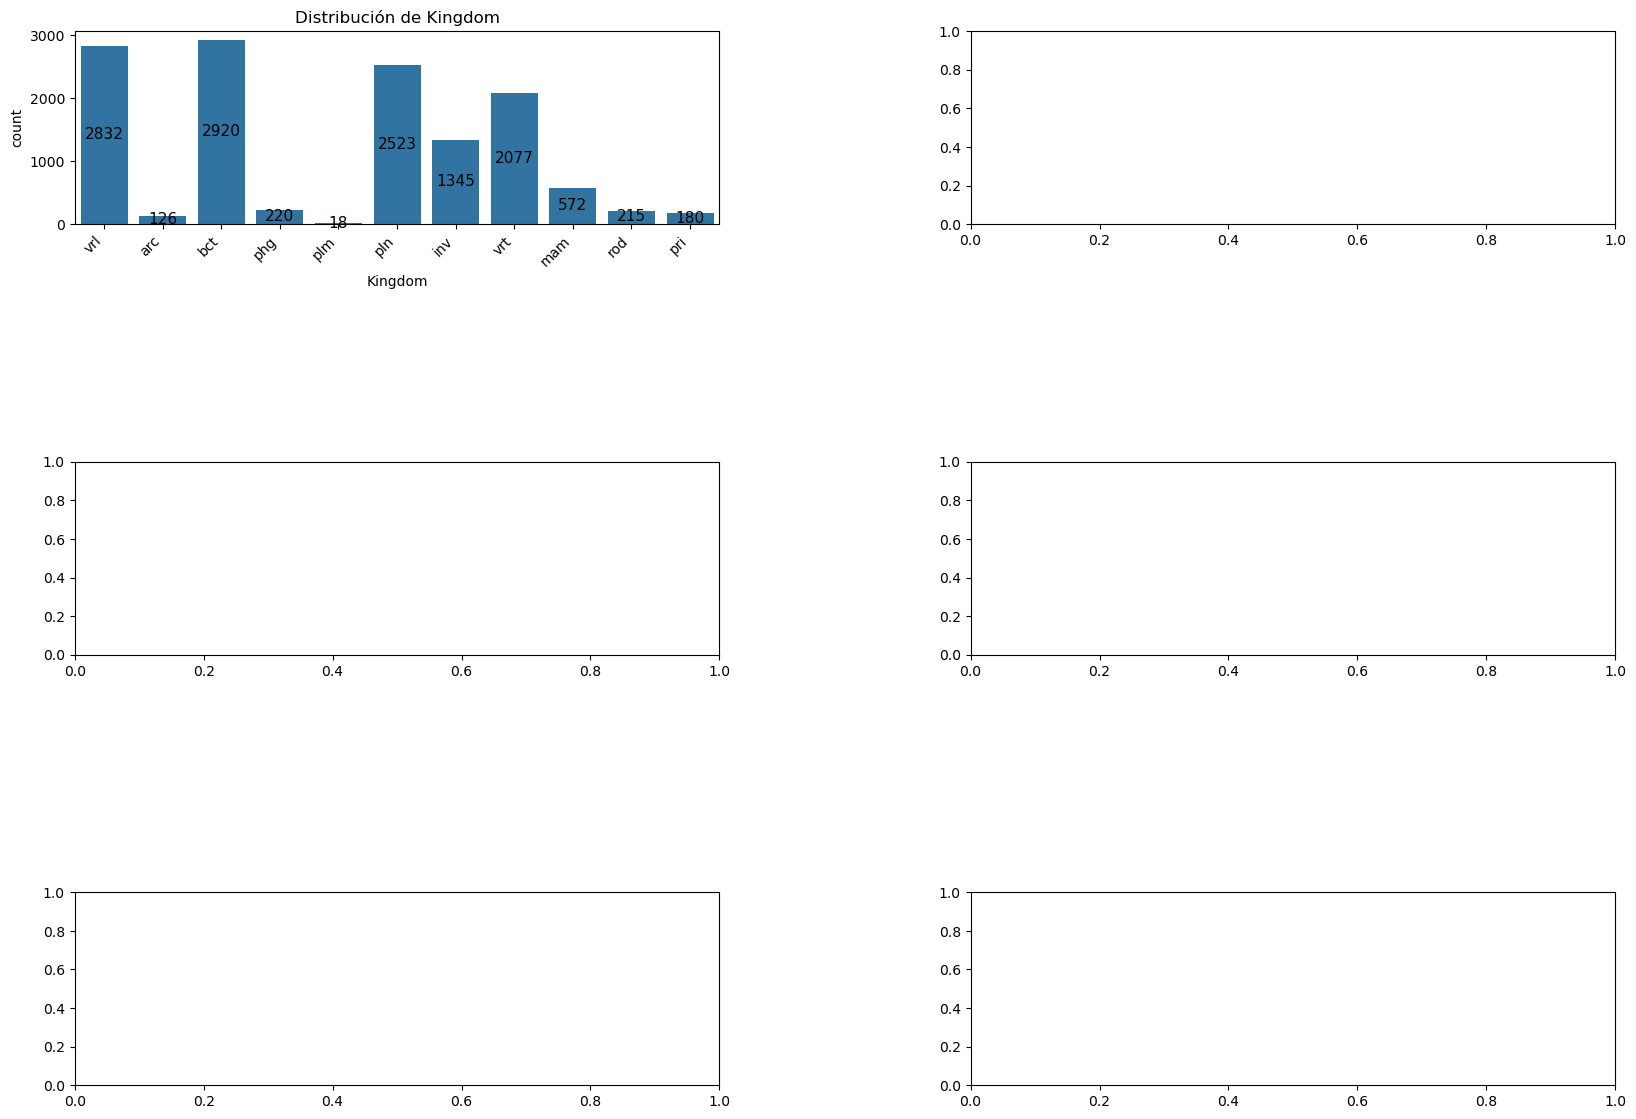

In [ ]:
# Suprimir todos los warnings
import warnings


warnings.filterwarnings('ignore')
# Configuración de la figura y la cuadrícula de subgráficas
fig, axes = plt.subplots(3, 2, figsize=(20, 15))  # Ajusta el tamaño según sea necesario
fig.tight_layout(pad=15.0)  # Ajusta el espaciado entre subgráficas

for i, var in enumerate(['Kingdom']):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    if var in df2.columns:
        sns.countplot(x=var, data=df2, ax=ax)
        ax.set_title(f'Distribución de {var}')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
        for p in ax.patches:
            # p.get_height() devuelve el valor del conteo
            height = p.get_height()
            # Añadir el texto encima de la barra
            ax.text(
                p.get_x() + p.get_width() / 2.,  # x
                height * 0.5 + 10,                         # y
                f'{int(height)}',                     # texto
                ha='center',                     # alineación horizontal
                va='center',                     # alineación vertical
                fontsize=11,                     # tamaño de la fuente
                color='black'                    # color del texto
            )
plt.show()

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13028 entries, 0 to 13027
Data columns (total 69 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Kingdom      13028 non-null  object 
 1   DNAtype      13028 non-null  int64  
 2   SpeciesID    13028 non-null  int64  
 3   Ncodons      13028 non-null  int64  
 4   SpeciesName  13028 non-null  object 
 5   UUU          13028 non-null  object 
 6   UUC          13028 non-null  object 
 7   UUA          13028 non-null  float64
 8   UUG          13028 non-null  float64
 9   CUU          13028 non-null  float64
 10  CUC          13028 non-null  float64
 11  CUA          13028 non-null  float64
 12  CUG          13028 non-null  float64
 13  AUU          13028 non-null  float64
 14  AUC          13028 non-null  float64
 15  AUA          13028 non-null  float64
 16  AUG          13028 non-null  float64
 17  GUU          13028 non-null  float64
 18  GUC          13028 non-null  float64
 19  GUA 

In [ ]:
df2.columns

Index(['Kingdom', 'DNAtype', 'SpeciesID', 'Ncodons', 'SpeciesName', 'UUU',
       'UUC', 'UUA', 'UUG', 'CUU', 'CUC', 'CUA', 'CUG', 'AUU', 'AUC', 'AUA',
       'AUG', 'GUU', 'GUC', 'GUA', 'GUG', 'GCU', 'GCC', 'GCA', 'GCG', 'CCU',
       'CCC', 'CCA', 'CCG', 'UGG', 'GGU', 'GGC', 'GGA', 'GGG', 'UCU', 'UCC',
       'UCA', 'UCG', 'AGU', 'AGC', 'ACU', 'ACC', 'ACA', 'ACG', 'UAU', 'UAC',
       'CAA', 'CAG', 'AAU', 'AAC', 'UGU', 'UGC', 'CAU', 'CAC', 'AAA', 'AAG',
       'CGU', 'CGC', 'CGA', 'CGG', 'AGA', 'AGG', 'GAU', 'GAC', 'GAA', 'GAG',
       'UAA', 'UAG', 'UGA'],
      dtype='object')

In [ ]:
df2['Kingdom'].unique()

array(['vrl', 'arc', 'bct', 'phg', 'plm', 'pln', 'inv', 'vrt', 'mam',
       'rod', 'pri'], dtype=object)

In [ ]:
df2.loc[:,'UUU':].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13028 entries, 0 to 13027
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   UUU     13028 non-null  object 
 1   UUC     13028 non-null  object 
 2   UUA     13028 non-null  float64
 3   UUG     13028 non-null  float64
 4   CUU     13028 non-null  float64
 5   CUC     13028 non-null  float64
 6   CUA     13028 non-null  float64
 7   CUG     13028 non-null  float64
 8   AUU     13028 non-null  float64
 9   AUC     13028 non-null  float64
 10  AUA     13028 non-null  float64
 11  AUG     13028 non-null  float64
 12  GUU     13028 non-null  float64
 13  GUC     13028 non-null  float64
 14  GUA     13028 non-null  float64
 15  GUG     13028 non-null  float64
 16  GCU     13028 non-null  float64
 17  GCC     13028 non-null  float64
 18  GCA     13028 non-null  float64
 19  GCG     13028 non-null  float64
 20  CCU     13028 non-null  float64
 21  CCC     13028 non-null  float64
 22

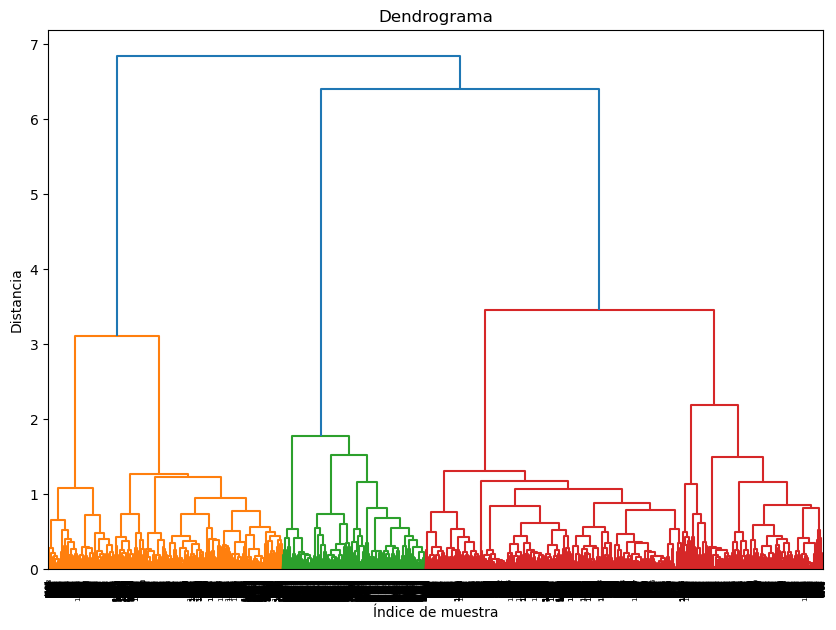

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage


# Calcular la matriz de linkage
Z = linkage(df2.loc[:,'UUA':], method='ward')

# Crear y mostrar el dendrograma
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrograma')
plt.xlabel('Índice de muestra')
plt.ylabel('Distancia')
plt.show()


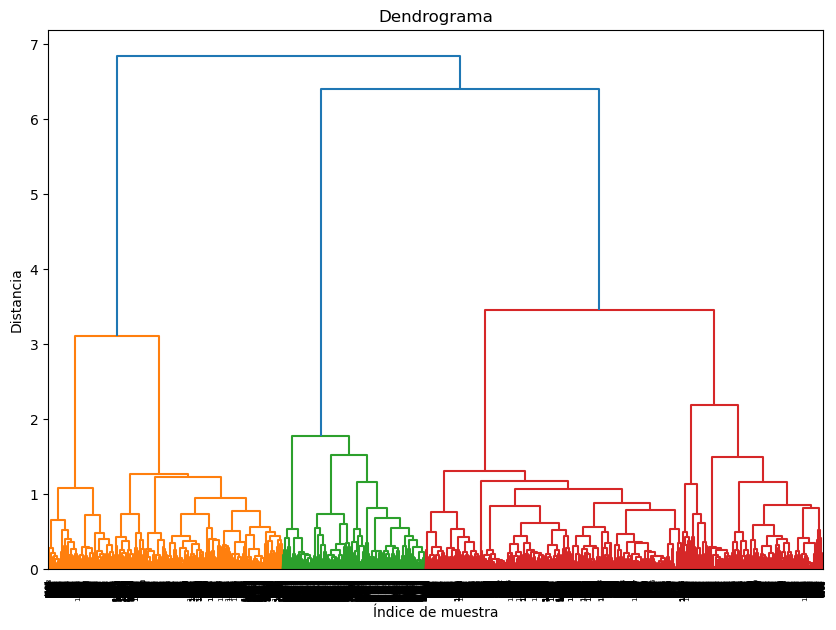

ValueError: All arrays must be of the same length

<Figure size 1000x700 with 0 Axes>

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Generar un conjunto de datos aleatorios
np.random.seed(42)
data = np.random.rand(10, 4)  # 10 muestras, 4 características

# Calcular la matriz de linkage
Z = linkage(df2.loc[:,'UUA':], method='ward')

# Definir el número de grupos
num_groups = 11

# Obtener los grupos
clusters = fcluster(Z, num_groups, criterion='maxclust')

# Crear el dendrograma
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrograma')
plt.xlabel('Índice de muestra')
plt.ylabel('Distancia')
plt.show()

# Graficar los datos con los grupos identificados
plt.figure(figsize=(10, 7))
sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=clusters, palette='Set1', s=100)
plt.title('Datos agrupados')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend(title='Grupo')
plt.show()


Dimensiones de data: (10, 4)
Dimensiones de clusters: (13028,)


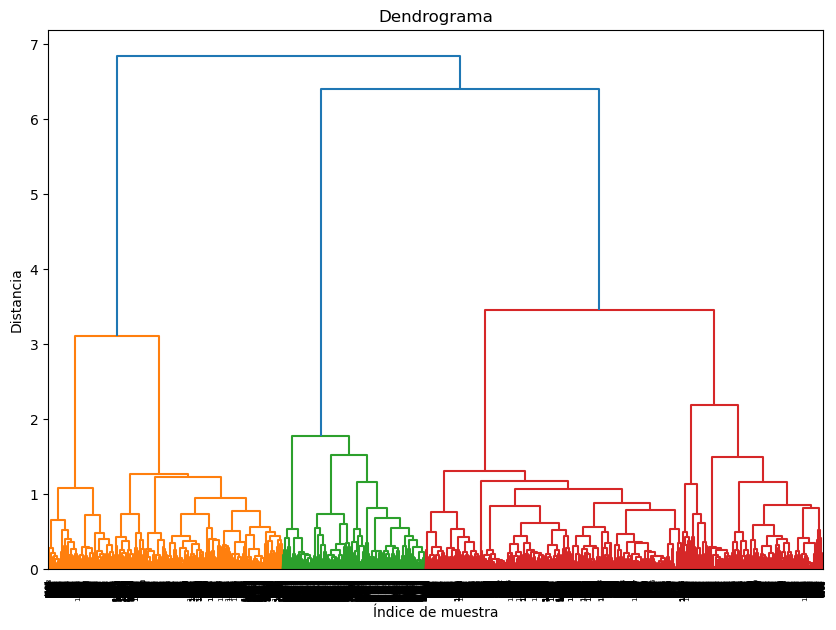

ValueError: All arrays must be of the same length

<Figure size 1000x700 with 0 Axes>

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Generar un conjunto de datos aleatorios
np.random.seed(42)
data = np.random.rand(10, 4)  # 10 muestras, 4 características

# Calcular la matriz de linkage
Z = linkage(df2.loc[:,'UUA':], method='ward')

# Definir el número de grupos
num_groups = 8

# Obtener los grupos
clusters = fcluster(Z, num_groups, criterion='maxclust')

# Verificar dimensiones
print("Dimensiones de data:", data.shape)
print("Dimensiones de clusters:", clusters.shape)

# Crear el dendrograma
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrograma')
plt.xlabel('Índice de muestra')
plt.ylabel('Distancia')
plt.show()

# Graficar los datos con los grupos identificados
# Utilizamos solo las dos primeras características para graficar
plt.figure(figsize=(10, 7))
sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=clusters, palette='Set1', s=100)
plt.title('Datos agrupados')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend(title='Grupo')
plt.show()
